<a href="https://colab.research.google.com/github/Nato9-7/EDA_FundamentosML_RenatoDiaz/blob/main/InformeML_RegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # Pandas es una biblioteca de análisis y manipulación de datos.
import numpy as np # Numpy es una biblioteca para el cálculo numérico en Python.
import matplotlib.pyplot as plt # Matplotlib es una biblioteca para la creación de gráficos en Python.
from scipy.stats import norm # La distribución normal es una distribución de probabilidad continua que se utiliza ampliamente en estadística.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
cs_df = pd.read_csv(name, sep=",", encoding='UTF-8')

Saving DF_CS_ARREGLADO.csv to DF_CS_ARREGLADO.csv


count    666.000000
mean      79.792793
std       22.072178
min        6.000000
25%       66.000000
50%       78.000000
75%       94.000000
max      136.000000
Name: RoundKills, dtype: float64


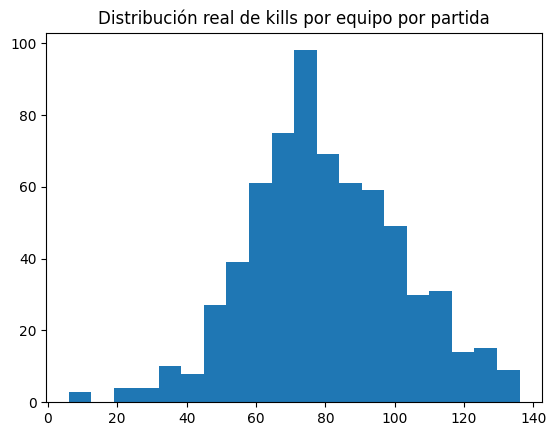

In [3]:
datos = cs_df.groupby(['MatchId', 'Team']).agg({
    'RoundKills': 'sum',
    'TeamStartingEquipmentValue': 'mean',
    'PrimarySniperRifle': 'mean',
    'RLethalGrenadesThrown': 'sum',
    'RNonLethalGrenadesThrown': 'sum',
    "PrimaryHeavy" : "mean",
    "PrimarySMG" : "mean",
    "PrimaryPistol" : "mean"
}).reset_index()
# Verificar distribución
print(datos['RoundKills'].describe())
plt.hist(datos['RoundKills'], bins=20)
plt.title('Distribución real de kills por equipo por partida')
plt.show()

#REGRESION LINEAL SIMPLE

In [4]:
X = datos[['TeamStartingEquipmentValue']]
y = datos['RoundKills']

##Entrenamiento de los datos

Dividimos los datos en un 80% para entrenamiento y un 20% para prueba. Para una mejor comparación de modelos de regresión utilizaremos la semilla 42

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Modelamiento de los datos

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lin = linear_model.predict(X_test)

##Observación

R2 Score: 0.6020206318389841
MAE: 12.260298796482763


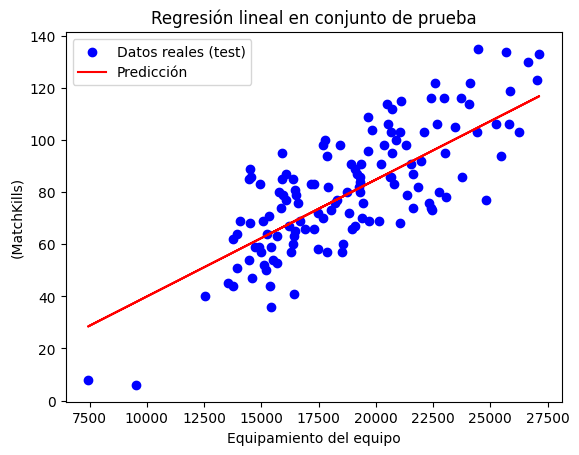

In [7]:

r2 =  r2_score(y_test, y_pred_lin)

# Evaluación del Regresion Lineal
print("R2 Score:", r2_score(y_test, y_pred_lin))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
plt.scatter(X_test, y_test, color='blue', label="Datos reales (test)")
plt.plot(X_test, y_pred_lin, color='red', label="Predicción")
plt.xlabel("Equipamiento del equipo")
plt.ylabel("(MatchKills)")
plt.title("Regresión lineal en conjunto de prueba")
plt.legend()
plt.show()

Observamos que el r2 (coeficiente de determinación) es de un 60%, lo cual nos indica una relación moderada entre el valor del equipamiento y la probabilidad de obtener kills. Se observa también, un MAE (Mean Absolute Error) de 12, por lo que este modelo nos da un margen de error de entre +-12 kills